# Identifying and Analyzing Twitter Hashtags



In [2]:
import matplotlib.pyplot as plt
import itertools
import json
import pandas as pd
import pymongo
from collections import Counter

In [3]:
client = pymongo.MongoClient()
db = client['GA_Runoffs']

In [4]:
# Find tweets that include #GAPol or #GASen

hashtags = db.collected_tweets.find({"entities.hashtags":{'$exists': True}, "$text": {"$search":"#gapol #gasen"}}, 
                                    {'entities.hashtags.tag':1,'category':1,'created_at':1})

In [6]:
# Convert PyMongo cursor object to Pandas dataframe
hashtags2 = pd.DataFrame(list(hashtags))

In [7]:
# Count the number of tweets with hashtags
len(hashtags2)

30642

In [8]:
hashtags2.head(5)

,_id,created_at,entities,category
0,5ff4def1b606b9d6dc3b8d6d,2021-01-04T20:31:24.000Z,"{'hashtags': [{'tag': 'gapol'}, {'tag': 'gasen...",hashtag_search
1,5fecb29e88da48afa84ec2dd,2020-12-29T14:18:08.000Z,"{'hashtags': [{'tag': 'gapol'}, {'tag': 'gasen...",hashtag_search
2,5fecb29e88da48afa84ec2f1,2020-12-29T14:07:34.000Z,"{'hashtags': [{'tag': 'gapol'}, {'tag': 'gasen...",hashtag_search
3,5fecb29e88da48afa84ec2f7,2020-12-29T14:04:51.000Z,"{'hashtags': [{'tag': 'gapol'}, {'tag': 'gasen...",hashtag_search
4,5fecb29e88da48afa84ec2f4,2020-12-29T14:05:46.000Z,"{'hashtags': [{'tag': 'gapol'}, {'tag': 'gasen...",hashtag_search


In [9]:
# Initialize empty list of hashtags
hashtags2['hashtags'] = pd.np.empty((len(hashtags2),0)).tolist()

# Unpack entities.hashtags
for index, value in hashtags2['entities'].items():
    for item in value['hashtags']:
        hashtags2['hashtags'].iloc[index].append(item['tag'].lower())

In [10]:
hashtags2.tail(3)

,_id,created_at,entities,category,hashtags
30639,5ff4de86b606b9d6dc3b7da0,2021-01-05T13:22:27.000Z,"{'hashtags': [{'tag': 'CravenRepublican'}, {'t...",hashtag_search,"[cravenrepublican, gopot, gasen]"
30640,5ff4deb7b606b9d6dc3b84c5,2021-01-05T02:25:54.000Z,"{'hashtags': [{'tag': 'GAGov'}, {'tag': 'GASoS...",hashtag_search,"[gagov, gasos, gagop, gasen]"
30641,5ff4de86b606b9d6dc3b7d57,2021-01-05T13:31:08.000Z,"{'hashtags': [{'tag': 'GASen'}, {'tag': 'FakeN...",hashtag_search,"[gasen, fakenews]"


In [11]:
# Calculate most commmon hashtags

# Create one list of tags
hashtags_list = hashtags2['hashtags'].to_list()

# Flatten the list then count items
hashtags_list = [y for x in hashtags_list for y in x]

# Count the top hashtags
top_hashtags = dict(Counter(hashtags_list).items())
top_hashtags = sorted(top_hashtags.items(), key=lambda x: x[1], reverse=True)

In [12]:
top_hashtags[0:10]

[('gapol', 22294),
 ('gasen', 21263),
 ('georgia', 4356),
 ('ossoff', 1377),
 ('warnock', 1359),
 ('vote', 1107),
 ('demcastga', 964),
 ('holdtheline', 921),
 ('runoff', 816),
 ('goodtrouble', 716)]

In [13]:
# Remove GAPol, GASen
top_hashtags.remove(('gapol', 22294))
top_hashtags.remove(('gasen', 21263))
top_hashtags.remove(('georgia', 4356))

In [28]:
# Select top 20 hashtags
hashtags_df = pd.DataFrame(top_hashtags, columns=["Hashtag", "Count"])
top_hashtags_df = hashtags_df.nlargest(20,'Count')
top_hashtags_df = top_hashtags_df.sort_values('Count', ascending = False)

Text(0, 0.5, '')

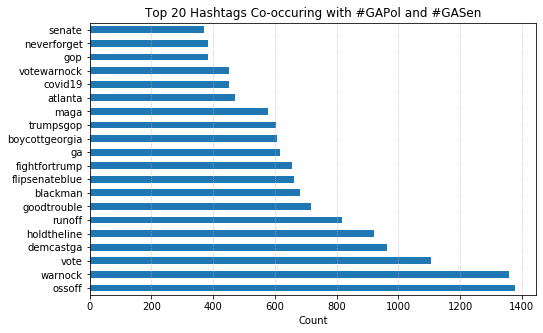

In [29]:
barchart = top_hashtags_df.plot.barh(x='Hashtag', y='Count', 
                                     title="Top 20 Hashtags Co-occuring with #GAPol and #GASen", 
                                     legend=None, figsize=(8, 5))
barchart.set_xlabel("Count")
barchart.xaxis.grid(linestyle=':')
barchart.set_ylabel(None)

In [26]:
barfig = barchart.get_figure()
barfig.savefig('gapolsen-occurance-chart.png', dpi=300, bbox_inches="tight")

In [ ]:
# Now, retrieve mentions of Warnock from database, extract, and 
# plot top hashtags (can turn this into a routine/function!)

In [ ]:
# Query database for tweets that ahave hashtags and were part of the Warnock query
hashtags_warnock = db.collected_tweets.find({"entities.hashtags": {'$exists': True}, "query":"(%40ReverendWarnock) -is:retweet"}, {'entities.hashtags.tag':1,
                                                                              'category':1, 'username':1,
                                                                              'created_at':1})

In [ ]:
# Count 'em
hashtags.count()

In [ ]:
# Dump the Mongo results to a dataframe
hashtags_warnock = pd.DataFrame(list(hashtags_warnock))
hashtags_warnock.head(10)

In [ ]:
# Create a column of empty lists for adding the hashtags
hashtags_warnock['hashtags'] = pd.np.empty((len(hashtags_warnock),0)).tolist()

In [ ]:
# Convert JSON list of hashtags to simple Python list, per tweet
for index, value in hashtags_warnock['entities'].items():
    for item in value['hashtags']:
        hashtags_warnock['hashtags'].iloc[index].append(item['tag'].lower())

In [ ]:
# Now, create single list of hashtags in the dataframe and count the occurances of each
hashtags_list = hashtags_warnock['hashtags'].to_list()
hashtags_list = [y for x in hashtags_list for y in x]
top_hashtags = dict(Counter(hashtags_list).items())
top_hashtags = sorted(top_hashtags.items(), key=lambda x: x[1], reverse=True)
top_hashtags


In [ ]:
# Remove Georgia hashtag
top_hashtags.remove(('georgia', 988))

In [ ]:
# Narrow down to top 20 and plot

top_hashtags_df = pd.DataFrame(top_hashtags, columns=["Hashtag", "Count"])

top_hashtags_df = top_hashtags_df.nlargest(20,'Count')
top_hashtags_df = top_hashtags_df.sort_values('Count')


barchart = top_hashtags_df.plot.barh(x='Hashtag', y='Count', 
                                     title="Top 20 Hashtags Co-occurring with Mentions of @ReverendWarnock", 
                                     legend=None, figsize=(8, 5))
barchart.set_xlabel("Count")
barchart.set_ylabel(None)
barchart.xaxis.grid(linestyle=':')

In [ ]:
# Save the plot
barfig = barchart.get_figure()
barfig.savefig('co-occurance-chart-warnock.png', dpi=300, bbox_inches="tight")